## Parsing the csv file, Visualizing Data


In [1]:
# Imports
import csv
import re

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
%cd /content/drive/Shareddrives/'Curriculum Project'

Parsing the CSV File:

In [ ]:
# Parse CSV File
tweets = []
with open("data/tweets.csv", "r", encoding="utf-8", errors="ignore") as csv_file:
    reader = csv.reader(csv_file)

    for row in reader:
        tweets.append(row)

Separate into Negative and Positive Tweets:

In [ ]:
neg = []
pos = []
for tweet in tweets:
    # Negative tweet
    if int(tweet[0]) == 0:
        neg.append(tweet[5])
    # Positive tweet
    else:
        pos.append(tweet[5])

Positive and Negative Tweets

In [ ]:
print("Number of Positive Tweets: " + str(len(pos)))
print("Number of Negative Tweets: " + str(len(neg)))

Find the most-used words for both types of tweets

In [ ]:
# splitSpecial:
# Set to true if you would like to split on all special characters
# Set to false if only splitting on spaces

def calculateOccurrences(tweets, splitSpecial = True):
  # Use dictionary from word to int
  occurrences = {}
  # Iterate through tweets
  for tweet in tweets:
      # Split words based on spaces or special characters if needed
      words = []
      if splitSpecial:    words = re.split(r'[ `!@#$%^&*()_+\-=\[\]{};:"\\|,.<>\/?~]', tweet)
      else:               words = tweet.split()

      for word in words:
          # Skip words with no characters
          if len(word.strip()) == 0:
              continue

          # Process the word
          word2 = word.lower()
          # Check if word is already in occurrences
          if word2 in occurrences.keys():
              # Update value
              occurrences[word2] += 1
          # Else, add word
          else:
              occurrences[word2] = 1

  return occurrences

In [ ]:
splitSpecial = False
negWords = calculateOccurrences(neg, splitSpecial)
posWords = calculateOccurrences(pos, splitSpecial)

Average Length of Tweets

In [ ]:
# Find average length of a list of tweets
def findAvg(tweets):
    count = 0
    for tweet in tweets:
        count += len(tweet)

    avg = count / len(tweets)

    return avg

# Find lengths of average positive and negative tweets
negAvg = findAvg(neg)
posAvg = findAvg(pos)
print("Avg. Length of Negative Tweets:", negAvg)
print("Avg. Length of Positive Tweets:", posAvg)

Avg. Length of Negative Tweets: 74.2702425
Avg. Length of Positive Tweets: 73.8062975


Function to Visualize Data:


In [ ]:
# Visualize occurrences data
def visualize(occurrences, max=10, descending=True):
    # Sort dictionary by values
    sortedOccurrences = sorted(occurrences.items(), key=lambda x:x[1], reverse=descending)

    for i in range(0, max):
        print(i+1, "  \t", sortedOccurrences[i][0], sortedOccurrences[i][1])
    print()

In [ ]:
# Define how many words to show
max = 100

print("Most Occurring Words in Negative Tweets:")
visualize(negWords, max)
print("Most Occurring Words in Positive Tweets:")
visualize(posWords, max)

Most Occurring Words in Negative Tweets:
1   	 i 459930
2   	 to 310288
3   	 the 255657
4   	 my 188443
5   	 a 180178
6   	 and 150065
7   	 is 125430
8   	 in 112139
9   	 it 101032
10   	 for 98058
11   	 of 92187
12   	 so 84477
13   	 you 82836
14   	 have 81872
15   	 on 80877
16   	 but 79616
17   	 i'm 72483
18   	 me 72298
19   	 not 71122
20   	 that 66744
21   	 just 62934
22   	 at 61605
23   	 was 58312
24   	 be 57467
25   	 this 49562
26   	 with 49181
27   	 no 46419
28   	 get 45077
29   	 go 41549
30   	 up 40748
31   	 like 39553
32   	 all 37968
33   	 out 37053
34   	 now 36005
35   	 work 34496
36   	 it's 33629
37   	 are 33292
38   	 got 32860
39   	 going 32681
40   	 don't 31772
41   	 do 31145
42   	 can't 30613
43   	 miss 30345
44   	 really 29466
45   	 im 29400
46   	 want 29203
47   	 back 29136
48   	 day 28487
49   	 too 27986
50   	 still 27938
51   	 from 27672
52   	 had 27310
53   	 am 26543
54   	 about 25456
55   	 - 24919
56   	 its 24556
57   

Creates occurrences dict based on difference between occurrences in pos. and neg. tweets

In [ ]:
# Iterate through all keys
allKeys = posWords.keys() | negWords.keys()
diff = {}
for key in allKeys:
    # Find positive and negative occurrences of the word
    posOccurrences = 0
    negOccurrences = 0
    if key in posWords.keys(): posOccurrences = posWords[key]
    if key in negWords.keys(): negOccurrences = negWords[key]

    # Set value
    diff[key] = posOccurrences - negOccurrences

In [ ]:
# Visualize data
print("Words that Occur More in Negative Tweets:")
visualize(diff, max, False)
print("Words that Occur More in Positive Tweets:")
visualize(diff, max)

Words that Occur More in Negative Tweets:
1   	 i -173257
2   	 my -64039
3   	 to -60262
4   	 not -40084
5   	 but -34556
6   	 no -28019
7   	 miss -24879
8   	 so -23184
9   	 work -20798
10   	 have -20449
11   	 is -19773
12   	 sad -19649
13   	 want -17417
14   	 i'm -17350
15   	 can't -16933
16   	 go -16365
17   	 wish -16139
18   	 me -16106
19   	 don't -15449
20   	 still -14451
21   	 hate -14397
22   	 in -14318
23   	 was -13882
24   	 bad -13824
25   	 feel -13461
26   	 at -12864
27   	 really -12749
28   	 sorry -12463
29   	 why -12060
30   	 too -11232
31   	 it -11011
32   	 this -10973
33   	 im -10326
34   	 sick -9572
35   	 didn't -9308
36   	 get -9211
37   	 last -9144
38   	 has -8949
39   	 back -8790
40   	 now -8741
41   	 need -8637
42   	 up -7888
43   	 had -7437
44   	 dont -7211
45   	 wanna -7104
46   	 am -7087
47   	 only -7028
48   	 cant -6944
49   	 been -6908
50   	 feeling -6652
51   	 lost -6559
52   	 poor -6354
53   	 its -6303
54   	 sl

In [ ]:
# Find the most-appearing words in positive and negative tweets
max = 100

sortedNeg = sorted(negWords.items(), key=lambda x:x[1], reverse=True)
mostCommonNegWords = []

for i in range(0, max):
    mostCommonNegWords.append(sortedNeg[i][0])
    
sortedPos = sorted(posWords.items(), key=lambda x:x[1], reverse=True)
mostCommonPosWords = []
for i in range(0, max):
    mostCommonPosWords.append(sortedPos[i][0])

In [ ]:
# Find list of words that appear on both
intersection = []
for negWord in mostCommonNegWords:
  if negWord in mostCommonPosWords: 
    intersection.append(negWord)


In [ ]:
# Find pos/neg words that are NOT in the intersection

posWordsNoIntersect = []
negWordsNoIntersect = []

for w in mostCommonNegWords:
  if w not in intersection: negWordsNoIntersect.append(w)

for w in mostCommonPosWords:
  if w not in intersection: posWordsNoIntersect.append(w)


In [ ]:
print("Negative Words (Not in Intersection): ")
for w in negWordsNoIntersect: print(w)

Negative Words (Not in Intersection): 
miss
want
last
wish
feel
has
sad
been
oh
why
bad
home
only
hate
sorry
he
her


In [ ]:
print("Positive Words (Not in Intersection): ")
for w in posWordsNoIntersect: print(w)

Positive Words (Not in Intersection): 
new
thanks
great
hope
happy
then
or
thank
night
i'll
well
nice
watching
twitter
morning
very
you're


Finding Occurrences of Links and Hashtags

In [ ]:
# Number of hashtags in negative tweets
negHashtags = 0
for negTweet in neg:
  for word in negTweet.split():
    if '#' in word: negHashtags += 1
  
# Number of hashtags in positive tweets
posHashtags = 0
for posTweet in pos:
  for word in posTweet.split():
    if '#' in word: posHashtags += 1

In [ ]:
print("Number of hashtags in negative tweets: " + str(negHashtags))
print("Number of hashtags in positive tweets: " + str(posHashtags))

Number of hashtags in negative tweets: 18929
Number of hashtags in positive tweets: 26089


In [ ]:
# Number of links in negative tweets
negLinks = 0
for negTweet in neg:
  for word in negTweet.split():
    if "http" in word: negLinks += 1
  
# Number of hashtags in positive tweets
posLinks = 0
for posTweet in pos:
  for word in posTweet.split():
    if "http" in word: posLinks += 1

In [ ]:
print("Number of links in negative tweets: " + str(negLinks))
print("Number of links in positive tweets: " + str(posLinks))

Number of links in negative tweets: 24365
Number of links in positive tweets: 47264


Visualizing Nouns that appear in Pos/Neg Tweets


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# https://stackoverflow.com/questions/28033882/determining-whether-a-word-is-a-noun-or-not

from nltk.corpus import wordnet as wn
nouns = {x.name().split('.', 1)[0] for x in wn.all_synsets('n')}


In [ ]:
# Iterate through negative words
negNouns = {}
for w in negWords.items():
    if w[0] in nouns: 
      negNouns[w[0]] = w[1]

# Iterate through positive words
posNouns = {}
for w in posWords.items():
    if w[0] in nouns:
      posNouns[w[0]] = w[1]

In [ ]:
# Sort by occurrences
sortedNegNouns = sorted(negNouns.items(), key=lambda x:x[1], reverse=True)
sortedPosNouns = sorted(posNouns.items(), key=lambda x:x[1], reverse=True)

In [ ]:
# Display data
limit = 100

print("Negative Nouns:")
for i in range(0, limit):
    print(sortedNegNouns[i])

print("\n\n\nPositive Nouns:")
for i in range(0, limit):
    print(sortedPosNouns[i])

Negative Nouns:
('i', 459930)
('a', 180178)
('at', 61605)
('no', 46419)
('get', 45077)
('go', 41549)
('like', 39553)
('out', 37053)
('now', 36005)
('work', 34496)
('are', 33292)
('going', 32681)
('do', 31145)
('miss', 30345)
('back', 29136)
('day', 28487)
('still', 27938)
('good', 23774)
('one', 23116)
('will', 22310)
('last', 21880)
('need', 21857)
('wish', 21549)
('feel', 21487)
('know', 21397)
('today', 21170)
('time', 20954)
('think', 20821)
('u', 20786)
('see', 19674)
('can', 19635)
('why', 18410)
('bad', 17932)
('home', 17634)
('more', 17241)
('hate', 16866)
('much', 16559)
('there', 15992)
('he', 15855)
('love', 15562)
('hope', 14064)
('here', 13769)
('then', 13222)
('night', 12727)
('sleep', 12489)
('right', 12455)
('well', 12371)
('cant', 11992)
('tomorrow', 11606)
('over', 11478)
('sick', 10512)
('feeling', 10386)
('way', 9974)
('being', 9920)
('school', 9622)
('down', 9244)
('working', 9048)
('people', 8691)
('take', 8488)
('morning', 8202)
('little', 8060)
('week', 7980)
('

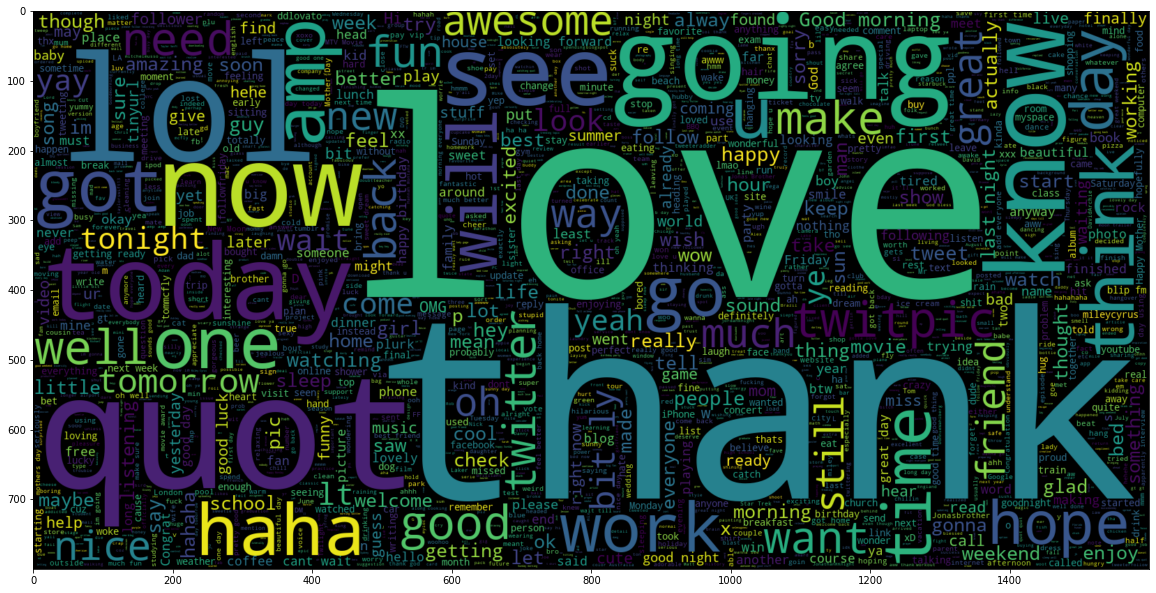

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(pos))
plt.imshow(wc , interpolation = 'bilinear')

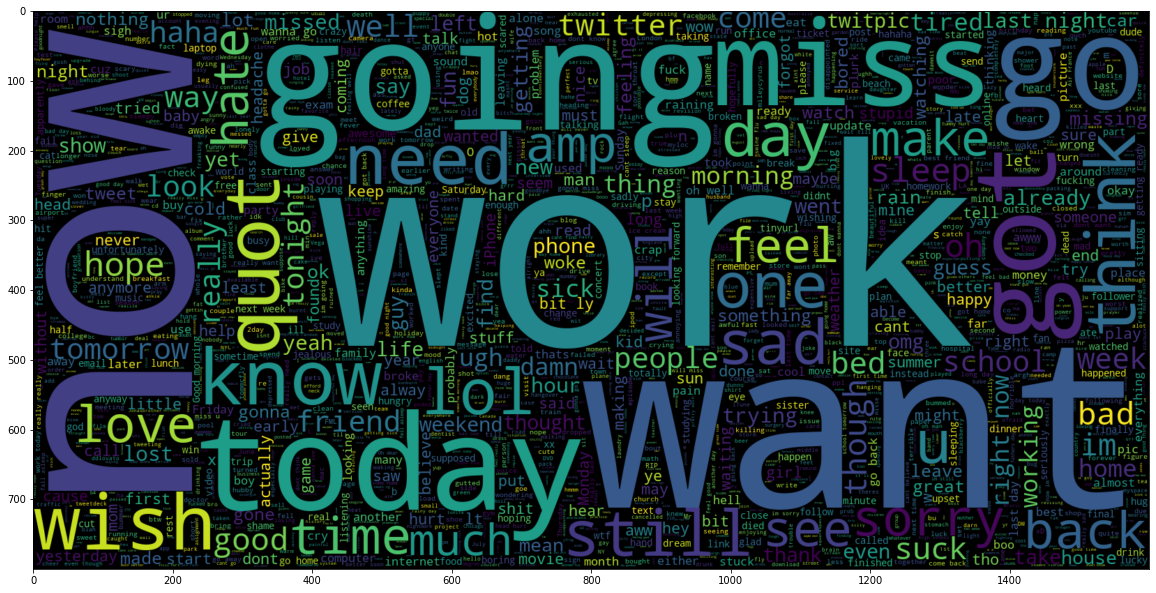

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(neg))
plt.imshow(wc , interpolation = 'bilinear')